In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option("display.max.columns", None)
pd.set_option("display.max.rows", 10)

In [3]:
# Read in and combine calls for service data 
import glob

all_files = glob.glob('CallData/*.xls')

frames = []

for filename in all_files:
    df = pd.read_excel(filename, index_col=None, header=0)
    frames.append(df)

callData = pd.concat(frames, axis=0, ignore_index=True)

In [4]:
callData

,Incident Number,Category,Problem Type,Response Date,Address,HOA,School District,Council District,Zipcode
0,SAPD-2022-0402465,Crimes Against Person Calls,Suspicious Vehicle,2022-04-01 00:04:10,8900 Data Point Dr,NaN,Northside ISD,8,78229
1,SAPD-2022-0402468,Crimes Against Person Calls,Suspicious Vehicle,2022-04-01 00:04:51,Chalmers Ave / Weinberg,NaN,Harlandale ISD,5,78214
2,SAPD-2022-0402490,Crimes Against Person Calls,Suspicious Vehicle,2022-04-01 00:08:11,Cliffbrier / Tree Village,Great Northwest,Northside ISD,6,78250
3,SAPD-2022-0402500,Crimes Against Person Calls,Disturbance (Gun Involved),2022-04-01 00:09:48,8600 Perrin Beitel,NaN,North East ISD,10,78217
4,SAPD-2022-0402510,Crimes Against Person Calls,Suspicious Vehicle,2022-04-01 00:12:05,100 Eaglerock Dr,Springvale NA,Northside ISD,4,78227
...,...,...,...,...,...,...,...,...,...
112275,SAPD-2022-0129724,Crimes Against Person Calls,Threats,2022-01-31 23:49:27,900 N Frio St,Gardendale NA,San Antonio ISD,5,78207
112276,SAPD-2022-0129725,Crimes Against Person Calls,Shooting,2022-01-31 23:50:00,4400 W Martin St,NaN,Edgewood ISD,5,78207
112277,SAPD-2022-0129732,Crimes Against Person Calls,Assault In Progress,2022-01-31 23:50:59,6300 Nw Loop 410,Thunderbird Hills,Northside ISD,7,78238-3803
112278,SAPD-2022-0129734,Crimes Against Person Calls,Threats,2022-01-31 23:52:21,600 W Lullwood Ave,Beacon Hill,San Antonio ISD,1,78212


In [5]:
# One column just has a zip code value of 's'
callData[callData['Zipcode'] == 'S']

,Incident Number,Category,Problem Type,Response Date,Address,HOA,School District,Council District,Zipcode
98067,SAPD-2021-1592357,Crimes Against Person Calls,Suspicious Vehicle,2021-12-14 00:02:24,30 Lynn Batts Ln,Oakwell Farms HOA,North East ISD,10,S


In [6]:
# 166 rows have NaN for zip code 
callData[callData['Zipcode'].isna()]

,Incident Number,Category,Problem Type,Response Date,Address,HOA,School District,Council District,Zipcode
503,SAPD-2022-0409445,Crimes Against Person Calls,Assault,2022-04-02 12:21:46,9300 Sw Loop 410,NaN,Southwest ISD,4,NaN
666,SAPD-2022-0411767,Crimes Against Person Calls,Assault In Progress,2022-04-02 22:09:00,500 N St Mary's St,Downtown Residents Association,San Antonio ISD,1,NaN
839,SAPD-2022-0413557,Crimes Against Person Calls,Fight,2022-04-03 08:50:47,4900 Wurzbach Pkwy,NaN,North East ISD,10,NaN
1955,SAPD-2022-0426861,Crimes Against Person Calls,Assault In Progress,2022-04-06 08:01:11,16200 Us Hwy 281 N,NaN,North East ISD,9,NaN
2303,SAPD-2022-0431902,Crimes Against Person Calls,Robbery of Individual,2022-04-07 09:58:05,16200 Us Hwy 281 N,NaN,North East ISD,9,NaN
...,...,...,...,...,...,...,...,...,...
108276,SAPD-2022-0068450,Crimes Against Person Calls,Suspicious Vehicle,2022-01-17 14:19:46,6700 Ih 35 N,NaN,North East ISD,2,NaN
109896,SAPD-2022-0093117,Crimes Against Person Calls,Assault In Progress,2022-01-23 14:16:42,500 N St Mary's St,Downtown Residents Association,San Antonio ISD,1,NaN
110569,SAPD-2022-0104090,Crimes Against Person Calls,Assault,2022-01-26 04:05:18,500 N St Mary's St,Downtown Residents Association,San Antonio ISD,1,NaN
111002,SAPD-2022-0111631,Crimes Against Person Calls,Lewd Conduct,2022-01-27 19:54:51,500 N St Mary's St,Downtown Residents Association,San Antonio ISD,1,NaN


In [7]:
# Drop unnecessary columns. Zip code is lowest level of location that we will use 
callData.drop(columns=['Address', 'HOA', 'School District', 'Council District', 'Incident Number', 'Category'], inplace=True)

In [8]:
callData

,Problem Type,Response Date,Zipcode
0,Suspicious Vehicle,2022-04-01 00:04:10,78229
1,Suspicious Vehicle,2022-04-01 00:04:51,78214
2,Suspicious Vehicle,2022-04-01 00:08:11,78250
3,Disturbance (Gun Involved),2022-04-01 00:09:48,78217
4,Suspicious Vehicle,2022-04-01 00:12:05,78227
...,...,...,...
112275,Threats,2022-01-31 23:49:27,78207
112276,Shooting,2022-01-31 23:50:00,78207
112277,Assault In Progress,2022-01-31 23:50:59,78238-3803
112278,Threats,2022-01-31 23:52:21,78212


In [9]:
# See remaining attributes and their datatypes 
callData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112280 entries, 0 to 112279
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Problem Type   112280 non-null  object        
 1   Response Date  112280 non-null  datetime64[ns]
 2   Zipcode        112114 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 2.6+ MB


In [10]:
# Drop all the rows with NaN
callData.dropna(inplace=True)
callData

,Problem Type,Response Date,Zipcode
0,Suspicious Vehicle,2022-04-01 00:04:10,78229
1,Suspicious Vehicle,2022-04-01 00:04:51,78214
2,Suspicious Vehicle,2022-04-01 00:08:11,78250
3,Disturbance (Gun Involved),2022-04-01 00:09:48,78217
4,Suspicious Vehicle,2022-04-01 00:12:05,78227
...,...,...,...
112275,Threats,2022-01-31 23:49:27,78207
112276,Shooting,2022-01-31 23:50:00,78207
112277,Assault In Progress,2022-01-31 23:50:59,78238-3803
112278,Threats,2022-01-31 23:52:21,78212


In [11]:
# Drop the record with 's' for a zip code 
sRow = callData[callData['Zipcode'] == 'S'].index
print(sRow)

Int64Index([98067], dtype='int64')


In [12]:
callData.drop(index=sRow, inplace=True)
callData

,Problem Type,Response Date,Zipcode
0,Suspicious Vehicle,2022-04-01 00:04:10,78229
1,Suspicious Vehicle,2022-04-01 00:04:51,78214
2,Suspicious Vehicle,2022-04-01 00:08:11,78250
3,Disturbance (Gun Involved),2022-04-01 00:09:48,78217
4,Suspicious Vehicle,2022-04-01 00:12:05,78227
...,...,...,...
112275,Threats,2022-01-31 23:49:27,78207
112276,Shooting,2022-01-31 23:50:00,78207
112277,Assault In Progress,2022-01-31 23:50:59,78238-3803
112278,Threats,2022-01-31 23:52:21,78212


In [13]:
# Sort the data by response date 
callData.sort_values(by=['Response Date'], inplace=True, ignore_index=True)
callData

,Problem Type,Response Date,Zipcode
0,Assault In Progress,2021-05-01 00:07:18,78220
1,Suspicious Vehicle,2021-05-01 00:14:10,78247
2,Suspicious Vehicle,2021-05-01 00:16:09,78216
3,Suspicious Vehicle,2021-05-01 00:16:55,78207
4,Suspicious Vehicle,2021-05-01 00:17:43,78254
...,...,...,...
112108,Suspicious Vehicle,2022-04-30 23:49:58,78227
112109,Threats,2022-04-30 23:50:01,78254
112110,Assault In Progress,2022-04-30 23:51:49,78250
112111,Assault In Progress,2022-04-30 23:52:34,78228


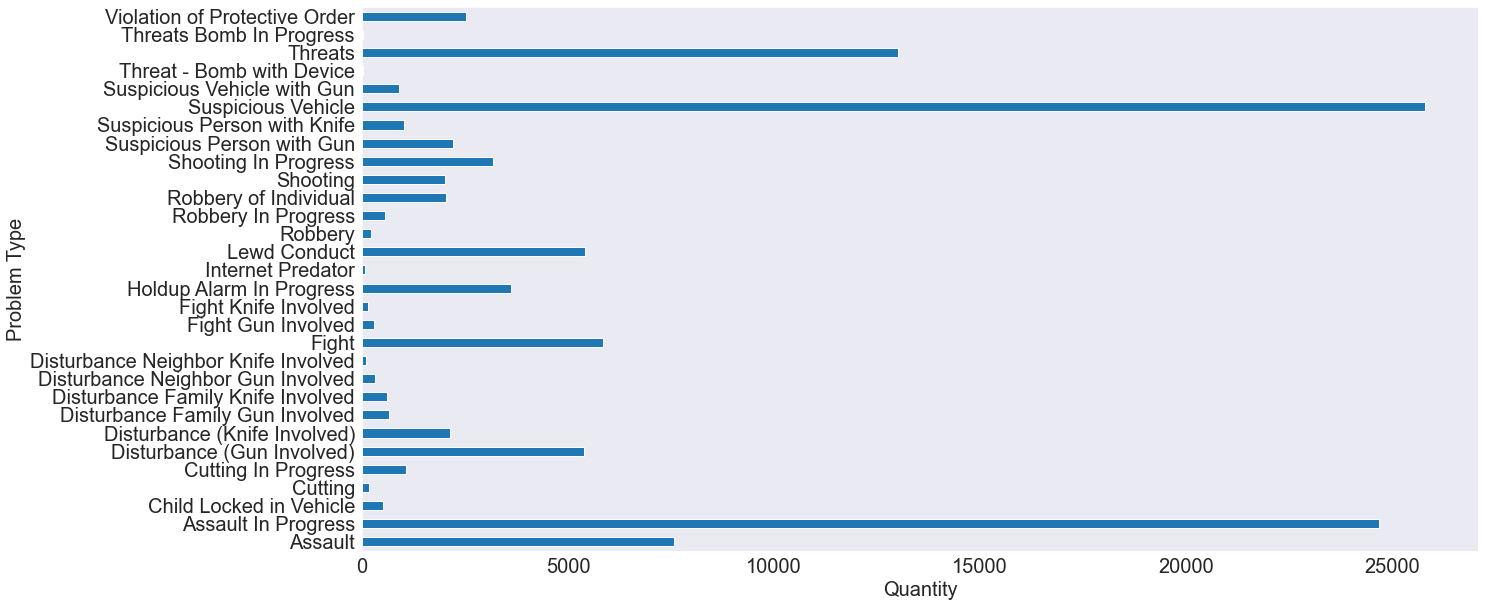

In [14]:
# High level view of the data

df = callData.groupby('Problem Type')['Response Date'].count()
plt.figure(figsize=(20, 10))
sns.set_style("dark")
ax = df.plot.barh()
ax.set_xlabel("Quantity")
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)

In [15]:
# Remove last four digits from zip codes with nine digits
# The last four digits represent specific delivery routes, and are an unwanted level of geographical abstraction

# First change the zip code to be a string
callData = callData.astype({'Zipcode': 'str'})

# Find the total number of rows to loop through
numberOfRows = callData.shape[0]

# Get the column number of the zip code column
columnNumber = callData.columns.get_loc("Zipcode")

# Loop through each row and leave only the first 5 characters
for index in range(numberOfRows):
    zipcode = callData.iat[index, columnNumber]
    callData.iat[index, columnNumber] = zipcode[:5] 

callData

,Problem Type,Response Date,Zipcode
0,Assault In Progress,2021-05-01 00:07:18,78220
1,Suspicious Vehicle,2021-05-01 00:14:10,78247
2,Suspicious Vehicle,2021-05-01 00:16:09,78216
3,Suspicious Vehicle,2021-05-01 00:16:55,78207
4,Suspicious Vehicle,2021-05-01 00:17:43,78254
...,...,...,...
112108,Suspicious Vehicle,2022-04-30 23:49:58,78227
112109,Threats,2022-04-30 23:50:01,78254
112110,Assault In Progress,2022-04-30 23:51:49,78250
112111,Assault In Progress,2022-04-30 23:52:34,78228


In [16]:
# Split response date into day, month, year, and hour
callData['Month'] = callData['Response Date'].dt.month
callData['Day'] = callData['Response Date'].dt.day
callData['Year'] = callData['Response Date'].dt.year
callData['Hour'] = callData['Response Date'].dt.hour

# Response Date column no longer needed 
callData.drop(columns='Response Date', inplace=True)
callData

,Problem Type,Zipcode,Month,Day,Year,Hour
0,Assault In Progress,78220,5,1,2021,0
1,Suspicious Vehicle,78247,5,1,2021,0
2,Suspicious Vehicle,78216,5,1,2021,0
3,Suspicious Vehicle,78207,5,1,2021,0
4,Suspicious Vehicle,78254,5,1,2021,0
...,...,...,...,...,...,...
112108,Suspicious Vehicle,78227,4,30,2022,23
112109,Threats,78254,4,30,2022,23
112110,Assault In Progress,78250,4,30,2022,23
112111,Assault In Progress,78228,4,30,2022,23


In [17]:
# Add quantity column, and initialize to one for every row
callData['Quantity'] = [1 for i in callData['Problem Type']]
callData

,Problem Type,Zipcode,Month,Day,Year,Hour,Quantity
0,Assault In Progress,78220,5,1,2021,0,1
1,Suspicious Vehicle,78247,5,1,2021,0,1
2,Suspicious Vehicle,78216,5,1,2021,0,1
3,Suspicious Vehicle,78207,5,1,2021,0,1
4,Suspicious Vehicle,78254,5,1,2021,0,1
...,...,...,...,...,...,...,...
112108,Suspicious Vehicle,78227,4,30,2022,23,1
112109,Threats,78254,4,30,2022,23,1
112110,Assault In Progress,78250,4,30,2022,23,1
112111,Assault In Progress,78228,4,30,2022,23,1


In [18]:
# Group hours into four segments, 12:00AM - 5:59AM, 6:00AM - 11:59AM, 12:00PM - 5:59PM, 6:00PM - 11:59PM
def TimeSlice(hour):
    """Break 24 hours into four six hour periods"""
    if (hour < 6):
        return 'early_morning'
    elif (hour >= 6 and hour < 12):
        return 'morning'
    elif (hour >= 12 and hour < 18):
        return 'afternoon'
    elif (hour >= 18):
        return 'night'
    else:
        raise Exception("Hour not inside range 00:00 - 23:59")

callData['Time'] = [TimeSlice(h) for h in callData['Hour']]
callData.drop(columns=['Hour'], inplace=True)
callData


,Problem Type,Zipcode,Month,Day,Year,Quantity,Time
0,Assault In Progress,78220,5,1,2021,1,early_morning
1,Suspicious Vehicle,78247,5,1,2021,1,early_morning
2,Suspicious Vehicle,78216,5,1,2021,1,early_morning
3,Suspicious Vehicle,78207,5,1,2021,1,early_morning
4,Suspicious Vehicle,78254,5,1,2021,1,early_morning
...,...,...,...,...,...,...,...
112108,Suspicious Vehicle,78227,4,30,2022,1,night
112109,Threats,78254,4,30,2022,1,night
112110,Assault In Progress,78250,4,30,2022,1,night
112111,Assault In Progress,78228,4,30,2022,1,night


In [19]:
# Aggregate data and find total quantity for a given problem type, zipcode, month, day, year, and time slice
data = callData.groupby(['Problem Type', 'Zipcode', 'Day', 'Month', 'Year', 'Time']).agg({'Quantity': 'count'})['Quantity']
data

Problem Type                   Zipcode  Day  Month  Year  Time         
Assault                        78023    3    1      2022  night            1
                                        4    12     2021  night            1
                                        6    4      2022  night            1
                                             6      2021  afternoon        1
                                             8      2021  night            1
                                                                          ..
Violation of Protective Order  78259    26   5      2021  morning          1
                                        27   1      2022  afternoon        1
                                        28   2      2022  night            1
                               78260    6    8      2021  morning          1
                               78264    4    11     2021  early_morning    1
Name: Quantity, Length: 90939, dtype: int64

In [20]:
# Turn data series back into a dataframe, turning multi index into columns
data = pd.DataFrame(data)
data.reset_index(inplace=True)
data

,Problem Type,Zipcode,Day,Month,Year,Time,Quantity
0,Assault,78023,3,1,2022,night,1
1,Assault,78023,4,12,2021,night,1
2,Assault,78023,6,4,2022,night,1
3,Assault,78023,6,6,2021,afternoon,1
4,Assault,78023,6,8,2021,night,1
...,...,...,...,...,...,...,...
90934,Violation of Protective Order,78259,26,5,2021,morning,1
90935,Violation of Protective Order,78259,27,1,2022,afternoon,1
90936,Violation of Protective Order,78259,28,2,2022,night,1
90937,Violation of Protective Order,78260,6,8,2021,morning,1


In [21]:
# See records that had more than ten calls
data[data['Quantity'] > 10]

,Problem Type,Zipcode,Day,Month,Year,Time,Quantity
43899,Lewd Conduct,78207,24,11,2021,night,15
44233,Lewd Conduct,78211,10,6,2021,night,15
44750,Lewd Conduct,78215,22,7,2021,afternoon,11
46296,Lewd Conduct,78232,14,5,2021,afternoon,20
53046,Shooting In Progress,78227,28,10,2021,afternoon,13


In [22]:
# Split categorical variables into binary attributes using one hot encoding
df_final = pd.get_dummies(data, columns = ['Problem Type', 'Zipcode', 'Time'])
df_final

,Day,Month,Year,Quantity,Problem Type_Assault,Problem Type_Assault In Progress,Problem Type_Child Locked in Vehicle,Problem Type_Cutting,Problem Type_Cutting In Progress,Problem Type_Disturbance (Gun Involved),Problem Type_Disturbance (Knife Involved),Problem Type_Disturbance Family Gun Involved,Problem Type_Disturbance Family Knife Involved,Problem Type_Disturbance Neighbor Gun Involved,Problem Type_Disturbance Neighbor Knife Involved,Problem Type_Fight,Problem Type_Fight Gun Involved,Problem Type_Fight Knife Involved,Problem Type_Holdup Alarm In Progress,Problem Type_Internet Predator,Problem Type_Lewd Conduct,Problem Type_Robbery,Problem Type_Robbery In Progress,Problem Type_Robbery of Individual,Problem Type_Shooting,Problem Type_Shooting In Progress,Problem Type_Suspicious Person with Gun,Problem Type_Suspicious Person with Knife,Problem Type_Suspicious Vehicle,Problem Type_Suspicious Vehicle with Gun,Problem Type_Threat - Bomb with Device,Problem Type_Threats,Problem Type_Threats Bomb In Progress,Problem Type_Violation of Protective Order,Zipcode_72118,Zipcode_78009,Zipcode_78015,Zipcode_78023,Zipcode_78073,Zipcode_78109,Zipcode_78112,Zipcode_78148,Zipcode_78154,Zipcode_78201,Zipcode_78202,Zipcode_78203,Zipcode_78204,Zipcode_78205,Zipcode_78207,Zipcode_78208,Zipcode_78209,Zipcode_78210,Zipcode_78211,Zipcode_78212,Zipcode_78213,Zipcode_78214,Zipcode_78215,Zipcode_78216,Zipcode_78217,Zipcode_78218,Zipcode_78219,Zipcode_78220,Zipcode_78221,Zipcode_78222,Zipcode_78223,Zipcode_78224,Zipcode_78225,Zipcode_78226,Zipcode_78227,Zipcode_78228,Zipcode_78229,Zipcode_78230,Zipcode_78231,Zipcode_78232,Zipcode_78233,Zipcode_78234,Zipcode_78235,Zipcode_78236,Zipcode_78237,Zipcode_78238,Zipcode_78239,Zipcode_78240,Zipcode_78241,Zipcode_78242,Zipcode_78243,Zipcode_78244,Zipcode_78245,Zipcode_78247,Zipcode_78248,Zipcode_78249,Zipcode_78250,Zipcode_78251,Zipcode_78252,Zipcode_78253,Zipcode_78254,Zipcode_78255,Zipcode_78256,Zipcode_78257,Zipcode_78258,Zipcode_78259,Zipcode_78260,Zipcode_78261,Zipcode_78263,Zipcode_78264,Zipcode_78266,Zipcode_78284,Zipcode_78288,Zipcode_78404,Time_afternoon,Time_early_morning,Time_morning,Time_night
0,3,1,2022,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,4,12,2021,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,6,4,2022,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,6,6,2021,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,6,8,2021,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90934,26,5,2021,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
90935,27,1,20

In [23]:
# Attributes of preprocessed dataframe 
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90939 entries, 0 to 90938
Columns: 112 entries, Day to Time_night
dtypes: int64(4), uint8(108)
memory usage: 12.1 MB


In [24]:
# Now the creation of the neural network 

In [25]:
# Import train_test_split to split dataset into training and testing sets
import sklearn
from sklearn.model_selection import train_test_split

In [26]:
# Seperate prediction attribute Quantity 
X = df_final.drop(['Quantity'],axis=1).values
y = df_final['Quantity'].values


In [27]:
# Split the dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [28]:
# Standardize features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [29]:
# fit_transform() calculates mean and variance when standardizing data
X_train = sc.fit_transform(X_train)

# transform() alone uses the previous calculated mean and variance to avoid having the model learn about the test set
X_test = sc.transform(X_test)

In [30]:
#import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

Init Plugin
Init Graph Optimizer
Init Kernel


In [31]:
model = Sequential()

Metal device set to: Apple M1


2022-07-09 16:45:29.599452: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-09 16:45:29.599551: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [32]:
in_dim = X_train.shape[1]
in_dim

111

In [33]:
# Creating the model using the parameters in https://www.mdpi.com/2076-0760/10/1/4/htm while also adding dropout regularization
model.add(Dense(32, activation='relu', input_dim=in_dim))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='relu'))
model.compile(loss='mae', optimizer='adam', metrics=['mse'])
model.fit(X_train, y_train, epochs=20)

2022-07-09 16:45:30.263174: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-07-09 16:45:30.263421: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/20


2022-07-09 16:45:36.838835: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2132/2132 [==============================] - 18s 4ms/step - loss: 0.4607 - mse: 0.5958
Epoch 2/20
2132/2132 [==============================] - 9s 4ms/step - loss: 0.2326 - mse: 0.4083
Epoch 3/20
2132/2132 [==============================] - 9s 4ms/step - loss: 0.2294 - mse: 0.3899
Epoch 4/20
2132/2132 [==============================] - 9s 4ms/step - loss: 0.2336 - mse: 0.4175
Epoch 5/20
2132/2132 [==============================] - 9s 4ms/step - loss: 0.2329 - mse: 0.4198
Epoch 6/20
2132/2132 [==============================] - 9s 4ms/step - loss: 0.2322 - mse: 0.4124
Epoch 7/20
2132/2132 [==============================] - 9s 4ms/step - loss: 0.2373 - mse: 0.4100
Epoch 8/20
2132/2132 [==============================] - 9s 4ms/step - loss: 0.2341 - mse: 0.4180
Epoch 9/20
2132/2132 [==============================] - 9s 4ms/step - loss: 0.2337 - mse: 0.4070
Epoch 10/20
2132/2132 [==============================] - 9s 4ms/step - loss: 0.2366 - mse: 0.4338
Epoch 11/20
2132/2132 [================

In [34]:
# evaluate the keras model
error = model.evaluate(X_test, y_test)


 59/711 [=>............................] - ETA: 1s - loss: 0.2278 - mse: 0.4079

2022-07-09 16:48:45.474129: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


711/711 [==============================] - 2s 3ms/step - loss: 0.2293 - mse: 0.3859


In [35]:
error[1]

0.3858729898929596

In [36]:
# Evaluate the model more thoroughly by taking average of error of 30 models
repeats = 31
scores = []
for i in range(1,repeats):
    # Split the data 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    
    # Standardize the data 
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    #Create the model
    model = Sequential()
    model.add(Dense(32, activation='relu', input_dim=in_dim))
    model.add(Dropout(0.2))
    model.add(Dense(8, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='relu'))
    model.compile(loss='mae', optimizer='adam', metrics=['mse'])
    model.fit(X_train, y_train, epochs=3)
    skill = model.evaluate(X_test, y_test)
    scores.append(skill[1])

Epoch 1/3
  26/2132 [..............................] - ETA: 9s - loss: 0.8982 - mse: 1.3436  

2022-07-09 16:48:47.808113: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2132/2132 [==============================] - 10s 4ms/step - loss: 0.4619 - mse: 0.6256
Epoch 2/3
2132/2132 [==============================] - 9s 4ms/step - loss: 0.2286 - mse: 0.3989
Epoch 3/3
 59/711 [=>............................] - ETA: 1s - loss: 0.2501 - mse: 0.4449

2022-07-09 16:49:16.030335: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


711/711 [==============================] - 2s 3ms/step - loss: 0.2357 - mse: 0.4070
Epoch 1/3
  24/2132 [..............................] - ETA: 9s - loss: 0.9349 - mse: 1.4298  

2022-07-09 16:49:18.305933: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2132/2132 [==============================] - 10s 4ms/step - loss: 0.4658 - mse: 0.6215
Epoch 2/3
2132/2132 [==============================] - 9s 4ms/step - loss: 0.2355 - mse: 0.4137
Epoch 3/3
 58/711 [=>............................] - ETA: 1s - loss: 0.2215 - mse: 0.3658

2022-07-09 16:49:46.074901: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


711/711 [==============================] - 2s 3ms/step - loss: 0.2310 - mse: 0.4115
Epoch 1/3
  24/2132 [..............................] - ETA: 9s - loss: 0.9273 - mse: 1.4590 

2022-07-09 16:49:48.336142: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2132/2132 [==============================] - 10s 4ms/step - loss: 0.4668 - mse: 0.6265
Epoch 2/3
2132/2132 [==============================] - 9s 4ms/step - loss: 0.2320 - mse: 0.4109
Epoch 3/3
 58/711 [=>............................] - ETA: 1s - loss: 0.2367 - mse: 0.4769

2022-07-09 16:50:15.992833: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


711/711 [==============================] - 2s 3ms/step - loss: 0.2326 - mse: 0.4181
Epoch 1/3
  23/2132 [..............................] - ETA: 9s - loss: 0.8610 - mse: 1.1369 

2022-07-09 16:50:18.277124: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2132/2132 [==============================] - 10s 4ms/step - loss: 0.4518 - mse: 0.5942
Epoch 2/3
2132/2132 [==============================] - 9s 4ms/step - loss: 0.2343 - mse: 0.4083
Epoch 3/3
 58/711 [=>............................] - ETA: 1s - loss: 0.2417 - mse: 0.5109

2022-07-09 16:50:45.825023: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


711/711 [==============================] - 2s 3ms/step - loss: 0.2332 - mse: 0.4155
Epoch 1/3
  24/2132 [..............................] - ETA: 9s - loss: 0.8735 - mse: 1.1261 

2022-07-09 16:50:48.096900: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2132/2132 [==============================] - 10s 4ms/step - loss: 0.4659 - mse: 0.5979
Epoch 2/3
2132/2132 [==============================] - 9s 4ms/step - loss: 0.2327 - mse: 0.4003
Epoch 3/3
 58/711 [=>............................] - ETA: 1s - loss: 0.1914 - mse: 0.2872

2022-07-09 16:51:16.522893: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


711/711 [==============================] - 2s 3ms/step - loss: 0.2310 - mse: 0.4069
Epoch 1/3
  21/2132 [..............................] - ETA: 10s - loss: 0.8678 - mse: 1.2839

2022-07-09 16:51:18.810069: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2132/2132 [==============================] - 10s 5ms/step - loss: 0.4447 - mse: 0.5851
Epoch 2/3
2132/2132 [==============================] - 10s 5ms/step - loss: 0.2347 - mse: 0.4280
Epoch 3/3
 54/711 [=>............................] - ETA: 1s - loss: 0.2663 - mse: 0.4271

2022-07-09 16:51:48.762752: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


711/711 [==============================] - 2s 3ms/step - loss: 0.2368 - mse: 0.4136
Epoch 1/3
  23/2132 [..............................] - ETA: 9s - loss: 0.9266 - mse: 1.7768 

2022-07-09 16:51:51.119149: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2132/2132 [==============================] - 11s 5ms/step - loss: 0.4453 - mse: 0.5947
Epoch 2/3
2132/2132 [==============================] - 10s 5ms/step - loss: 0.2376 - mse: 0.4236
Epoch 3/3
 55/711 [=>............................] - ETA: 1s - loss: 0.2566 - mse: 0.4473

2022-07-09 16:52:22.425201: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


711/711 [==============================] - 2s 3ms/step - loss: 0.2321 - mse: 0.3955
Epoch 1/3
  22/2132 [..............................] - ETA: 10s - loss: 0.9170 - mse: 1.3107 

2022-07-09 16:52:25.166302: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2132/2132 [==============================] - 11s 5ms/step - loss: 0.4629 - mse: 0.5977
Epoch 2/3
2132/2132 [==============================] - 11s 5ms/step - loss: 0.2325 - mse: 0.4086
Epoch 3/3
 58/711 [=>............................] - ETA: 1s - loss: 0.2178 - mse: 0.3352

2022-07-09 16:52:57.161359: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


711/711 [==============================] - 2s 3ms/step - loss: 0.2297 - mse: 0.3988
Epoch 1/3
  23/2132 [..............................] - ETA: 9s - loss: 0.9191 - mse: 1.4551  

2022-07-09 16:52:59.797301: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2132/2132 [==============================] - 11s 5ms/step - loss: 0.4457 - mse: 0.5857
Epoch 2/3
2132/2132 [==============================] - 11s 5ms/step - loss: 0.2333 - mse: 0.4106
Epoch 3/3
 56/711 [=>............................] - ETA: 1s - loss: 0.2585 - mse: 0.4525

2022-07-09 16:53:34.453782: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


711/711 [==============================] - 2s 3ms/step - loss: 0.2308 - mse: 0.4049
Epoch 1/3
  23/2132 [..............................] - ETA: 9s - loss: 0.8850 - mse: 1.3024 

2022-07-09 16:53:36.941515: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2132/2132 [==============================] - 11s 5ms/step - loss: 0.4548 - mse: 0.6082
Epoch 2/3
2132/2132 [==============================] - 11s 5ms/step - loss: 0.2329 - mse: 0.4105
Epoch 3/3
 55/711 [=>............................] - ETA: 1s - loss: 0.2427 - mse: 0.4289

2022-07-09 16:54:10.020192: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


711/711 [==============================] - 2s 3ms/step - loss: 0.2322 - mse: 0.4046
Epoch 1/3
  23/2132 [..............................] - ETA: 10s - loss: 0.8965 - mse: 1.1697

2022-07-09 16:54:12.499481: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2132/2132 [==============================] - 11s 5ms/step - loss: 0.4748 - mse: 0.6151
Epoch 2/3
2132/2132 [==============================] - 11s 5ms/step - loss: 0.2316 - mse: 0.4018
Epoch 3/3
 54/711 [=>............................] - ETA: 1s - loss: 0.2161 - mse: 0.3581

2022-07-09 16:54:45.662749: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


711/711 [==============================] - 2s 3ms/step - loss: 0.2332 - mse: 0.4121
Epoch 1/3
  24/2132 [..............................] - ETA: 9s - loss: 0.9050 - mse: 1.2384 

2022-07-09 16:54:48.162433: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2132/2132 [==============================] - 11s 5ms/step - loss: 0.4526 - mse: 0.5808
Epoch 2/3
2132/2132 [==============================] - 11s 5ms/step - loss: 0.2333 - mse: 0.3964
Epoch 3/3
 55/711 [=>............................] - ETA: 1s - loss: 0.2400 - mse: 0.4103

2022-07-09 16:55:21.382681: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


711/711 [==============================] - 2s 3ms/step - loss: 0.2297 - mse: 0.4086
Epoch 1/3
  23/2132 [..............................] - ETA: 9s - loss: 0.8588 - mse: 1.1404 

2022-07-09 16:55:23.887076: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2132/2132 [==============================] - 11s 5ms/step - loss: 0.4557 - mse: 0.5838
Epoch 2/3
2132/2132 [==============================] - 11s 5ms/step - loss: 0.2353 - mse: 0.4403
Epoch 3/3
 53/711 [=>............................] - ETA: 1s - loss: 0.2314 - mse: 0.3657

2022-07-09 16:55:57.495328: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


711/711 [==============================] - 2s 3ms/step - loss: 0.2332 - mse: 0.4060
Epoch 1/3
  23/2132 [..............................] - ETA: 10s - loss: 0.9540 - mse: 1.9110

2022-07-09 16:56:00.081011: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2132/2132 [==============================] - 12s 5ms/step - loss: 0.4563 - mse: 0.6024
Epoch 2/3
2132/2132 [==============================] - 15s 7ms/step - loss: 0.2321 - mse: 0.3949
Epoch 3/3
 55/711 [=>............................] - ETA: 1s - loss: 0.2626 - mse: 0.4999

2022-07-09 16:56:38.588925: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


711/711 [==============================] - 2s 3ms/step - loss: 0.2323 - mse: 0.4034
Epoch 1/3
  23/2132 [..............................] - ETA: 10s - loss: 0.8417 - mse: 1.1161

2022-07-09 16:56:41.190406: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2132/2132 [==============================] - 13s 6ms/step - loss: 0.4564 - mse: 0.5811
Epoch 2/3
2132/2132 [==============================] - 13s 6ms/step - loss: 0.2315 - mse: 0.3982
Epoch 3/3
 28/711 [>.............................] - ETA: 2s - loss: 0.2190 - mse: 0.4284 

2022-07-09 16:57:19.534362: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


711/711 [==============================] - 3s 4ms/step - loss: 0.2374 - mse: 0.4281
Epoch 1/3
   9/2132 [..............................] - ETA: 13s - loss: 0.9739 - mse: 1.5849  

2022-07-09 16:57:22.697307: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2132/2132 [==============================] - 13s 6ms/step - loss: 0.4779 - mse: 0.6271
Epoch 2/3
2132/2132 [==============================] - 13s 6ms/step - loss: 0.2338 - mse: 0.4074
Epoch 3/3
 52/711 [=>............................] - ETA: 2s - loss: 0.2260 - mse: 0.3666

2022-07-09 16:58:00.768480: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


711/711 [==============================] - 2s 3ms/step - loss: 0.2334 - mse: 0.4207
Epoch 1/3
  20/2132 [..............................] - ETA: 11s - loss: 0.9977 - mse: 1.8335

2022-07-09 16:58:03.471862: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2132/2132 [==============================] - 13s 6ms/step - loss: 0.4722 - mse: 0.6273
Epoch 2/3
2132/2132 [==============================] - 12s 6ms/step - loss: 0.2351 - mse: 0.4102
Epoch 3/3
 53/711 [=>............................] - ETA: 1s - loss: 0.2424 - mse: 0.4180

2022-07-09 16:58:40.738624: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


711/711 [==============================] - 2s 3ms/step - loss: 0.2336 - mse: 0.4172
Epoch 1/3
  22/2132 [..............................] - ETA: 10s - loss: 0.9164 - mse: 1.3983

2022-07-09 16:58:43.385433: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2132/2132 [==============================] - 12s 6ms/step - loss: 0.4664 - mse: 0.6060
Epoch 2/3
2132/2132 [==============================] - 12s 6ms/step - loss: 0.2352 - mse: 0.4103
Epoch 3/3
 51/711 [=>............................] - ETA: 2s - loss: 0.2250 - mse: 0.3633

2022-07-09 16:59:19.695624: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


711/711 [==============================] - 2s 3ms/step - loss: 0.2345 - mse: 0.4196
Epoch 1/3
  22/2132 [..............................] - ETA: 10s - loss: 0.9598 - mse: 1.3795

2022-07-09 16:59:22.339507: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2132/2132 [==============================] - 12s 6ms/step - loss: 0.4717 - mse: 0.6242
Epoch 2/3
2132/2132 [==============================] - 12s 6ms/step - loss: 0.2349 - mse: 0.4072
Epoch 3/3
 61/711 [=>............................] - ETA: 1s - loss: 0.2434 - mse: 0.4144

2022-07-09 16:59:59.462812: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


711/711 [==============================] - 3s 3ms/step - loss: 0.2284 - mse: 0.3967
Epoch 1/3
  23/2132 [..............................] - ETA: 10s - loss: 0.8756 - mse: 1.1200

2022-07-09 17:00:02.051685: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2132/2132 [==============================] - 12s 6ms/step - loss: 0.4490 - mse: 0.5684
Epoch 2/3
2132/2132 [==============================] - 12s 6ms/step - loss: 0.2351 - mse: 0.4081
Epoch 3/3
 53/711 [=>............................] - ETA: 1s - loss: 0.2395 - mse: 0.3949

2022-07-09 17:00:38.630578: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


711/711 [==============================] - 2s 3ms/step - loss: 0.2338 - mse: 0.4200
Epoch 1/3
  23/2132 [..............................] - ETA: 10s - loss: 0.9215 - mse: 1.3966

2022-07-09 17:00:41.270798: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2132/2132 [==============================] - 13s 6ms/step - loss: 0.4485 - mse: 0.5746
Epoch 2/3
2132/2132 [==============================] - 12s 6ms/step - loss: 0.2339 - mse: 0.4179
Epoch 3/3
 53/711 [=>............................] - ETA: 1s - loss: 0.2489 - mse: 0.4197

2022-07-09 17:01:18.296550: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


711/711 [==============================] - 2s 3ms/step - loss: 0.2388 - mse: 0.4321
Epoch 1/3
  19/2132 [..............................] - ETA: 12s - loss: 0.9219 - mse: 1.5864

2022-07-09 17:01:21.096921: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2132/2132 [==============================] - 13s 6ms/step - loss: 0.4654 - mse: 0.6107
Epoch 2/3
2132/2132 [==============================] - 13s 6ms/step - loss: 0.2315 - mse: 0.3998
Epoch 3/3
 52/711 [=>............................] - ETA: 1s - loss: 0.2315 - mse: 0.3683

2022-07-09 17:01:59.387585: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


711/711 [==============================] - 2s 3ms/step - loss: 0.2310 - mse: 0.3997
Epoch 1/3
  11/2132 [..............................] - ETA: 11s - loss: 0.9449 - mse: 1.3879  

2022-07-09 17:02:02.098184: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2132/2132 [==============================] - 13s 6ms/step - loss: 0.4488 - mse: 0.5993
Epoch 2/3
2132/2132 [==============================] - 13s 6ms/step - loss: 0.2304 - mse: 0.3923
Epoch 3/3
 52/711 [=>............................] - ETA: 2s - loss: 0.2308 - mse: 0.5337

2022-07-09 17:02:40.026438: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


711/711 [==============================] - 2s 3ms/step - loss: 0.2350 - mse: 0.4186
Epoch 1/3
  22/2132 [..............................] - ETA: 10s - loss: 0.9024 - mse: 1.3015

2022-07-09 17:02:42.706511: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2132/2132 [==============================] - 14s 6ms/step - loss: 0.4559 - mse: 0.6011
Epoch 2/3
2132/2132 [==============================] - 13s 6ms/step - loss: 0.2265 - mse: 0.3842
Epoch 3/3
 36/711 [>.............................] - ETA: 2s - loss: 0.2440 - mse: 0.4158 

2022-07-09 17:03:21.529944: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


711/711 [==============================] - 3s 3ms/step - loss: 0.2369 - mse: 0.4071
Epoch 1/3
  22/2132 [..............................] - ETA: 10s - loss: 0.9593 - mse: 1.6531

2022-07-09 17:03:24.431995: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2132/2132 [==============================] - 13s 6ms/step - loss: 0.4602 - mse: 0.6279
Epoch 2/3
2132/2132 [==============================] - 12s 6ms/step - loss: 0.2306 - mse: 0.3947
Epoch 3/3
 35/711 [>.............................] - ETA: 2s - loss: 0.1974 - mse: 0.2973 

2022-07-09 17:04:01.966060: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


711/711 [==============================] - 2s 3ms/step - loss: 0.2294 - mse: 0.4133
Epoch 1/3
  21/2132 [..............................] - ETA: 11s - loss: 0.8792 - mse: 1.1862

2022-07-09 17:04:04.655081: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2132/2132 [==============================] - 13s 6ms/step - loss: 0.4501 - mse: 0.5823
Epoch 2/3
2132/2132 [==============================] - 12s 6ms/step - loss: 0.2280 - mse: 0.4052
Epoch 3/3
 53/711 [=>............................] - ETA: 1s - loss: 0.2424 - mse: 0.4039

2022-07-09 17:04:41.835443: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


711/711 [==============================] - 2s 3ms/step - loss: 0.2399 - mse: 0.4241
Epoch 1/3
  22/2132 [..............................] - ETA: 10s - loss: 0.8390 - mse: 1.0550

2022-07-09 17:04:44.480530: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2132/2132 [==============================] - 13s 6ms/step - loss: 0.4497 - mse: 0.5788
Epoch 2/3
2132/2132 [==============================] - 12s 6ms/step - loss: 0.2346 - mse: 0.4136
Epoch 3/3
 52/711 [=>............................] - ETA: 1s - loss: 0.2249 - mse: 0.3774

2022-07-09 17:05:22.781004: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


711/711 [==============================] - 2s 3ms/step - loss: 0.2359 - mse: 0.4024
Epoch 1/3
  11/2132 [..............................] - ETA: 11s - loss: 0.9011 - mse: 1.2320  

2022-07-09 17:05:25.454485: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2132/2132 [==============================] - 14s 7ms/step - loss: 0.4614 - mse: 0.6168
Epoch 2/3
2132/2132 [==============================] - 15s 7ms/step - loss: 0.2349 - mse: 0.4162
Epoch 3/3
 32/711 [>.............................] - ETA: 2s - loss: 0.2492 - mse: 0.7606 

2022-07-09 17:06:08.573990: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


711/711 [==============================] - 2s 3ms/step - loss: 0.2322 - mse: 0.4010
Epoch 1/3
  20/2132 [..............................] - ETA: 11s - loss: 0.8662 - mse: 1.0987

2022-07-09 17:06:11.445401: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2132/2132 [==============================] - 13s 6ms/step - loss: 0.4524 - mse: 0.5875
Epoch 2/3
2132/2132 [==============================] - 13s 6ms/step - loss: 0.2344 - mse: 0.4098
Epoch 3/3
 33/711 [>.............................] - ETA: 2s - loss: 0.2331 - mse: 0.3673 

2022-07-09 17:06:51.051708: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


711/711 [==============================] - 2s 3ms/step - loss: 0.2337 - mse: 0.4099
Epoch 1/3
  11/2132 [..............................] - ETA: 11s - loss: 0.9714 - mse: 1.4322  

2022-07-09 17:06:53.902199: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2132/2132 [==============================] - 13s 6ms/step - loss: 0.4497 - mse: 0.6022
Epoch 2/3
2132/2132 [==============================] - 13s 6ms/step - loss: 0.2340 - mse: 0.4301
Epoch 3/3
 32/711 [>.............................] - ETA: 2s - loss: 0.2549 - mse: 0.5049 

2022-07-09 17:07:33.568906: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


711/711 [==============================] - 2s 3ms/step - loss: 0.2339 - mse: 0.3990


In [37]:
scores


[0.40696191787719727,
 0.411508172750473,
 0.41808876395225525,
 0.41547757387161255,
 0.4068755507469177,
 0.41363102197647095,
 0.3955073356628418,
 0.398777037858963,
 0.404946893453598,
 0.4045764207839966,
 0.4121134877204895,
 0.40859705209732056,
 0.4059910774230957,
 0.4033982753753662,
 0.4281368851661682,
 0.4207392930984497,
 0.41723132133483887,
 0.41955289244651794,
 0.3967319130897522,
 0.4199514091014862,
 0.43208661675453186,
 0.39974546432495117,
 0.4185698330402374,
 0.4071158766746521,
 0.41328439116477966,
 0.42407330870628357,
 0.40235185623168945,
 0.4010348618030548,
 0.4099135100841522,
 0.3989793062210083]

In [38]:
mean_skill = (sum(scores)/len(scores))
mean_skill

0.4105316440264384

In [39]:
# Create 95% confidence interval
standard_deviation = np.std(scores)

standard_error = standard_deviation / np.sqrt(len(scores))

In [40]:
interval = standard_error * 1.96
lower_interval = mean_skill - interval
upper_interval = mean_skill + interval

In [42]:
print("lower interval: %.5f" % (lower_interval))
print("mean error: %.5f" % (mean_skill))
print("upper interval: %.5f" % (upper_interval))

lower interval: 0.40721
mean error: 0.41053
upper interval: 0.41385


In [43]:
# Running predictions on the whole test set
y_pred = model.predict(X_test)
y_pred

2022-07-09 17:17:31.256693: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([[1.0000066 ],
       [1.000023  ],
       [0.99999106],
       ...,
       [1.000016  ],
       [0.9999838 ],
       [1.0000206 ]], dtype=float32)

In [44]:
# Run a single prediction
testArray = X_test[0]
testArray = testArray.reshape(1, -1)
new_pred = model.predict((testArray))
new_pred

array([[1.0000066]], dtype=float32)